# Star Classification and Prediction

Author: Andrew Heider

Course Project, UC Irvine, Math 10, F23

## Introduction

Introduce your project here.  Maybe 3 sentences.

My project will be focused around using a 6 class star dataset for star classificiation that will utilized deep learning approaches. This dataset will include seveal features of the star which are Absolute Temperature, Relative Luminosity, Relative Radius, Absolute Magnitude, Star Color, Spectral Class, and Star Type. The purpose of this dataset is to prove that these stars follow a certain graph in the celestial space, specifically the Hertzsprung-Russel Diagram in order to classify stars by plotting its feautures based on the graph. This project's main goal is to show visualization of temperature and luminosity relations within the dataset and will be comparing both the Random Forest model and the Logistic Regression model in prediction of star types from given temperature and luminosity values within the dataset.

## Star Data Section

You can either have all one section or divide into multiple sections.  To make new sections, use `##` in a markdown cell.  Double-click this cell for an example of using `##`

In [ ]:
import pandas as pd

star_data = pd.read_csv("6 class csv.csv")
star_data = star_data.dropna(axis = 1)
star_data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Graphical Relationship of Luminosity and Temperature for Spectral Class

In [ ]:
import altair as alt

star_chart = alt.Chart(star_data).mark_circle().encode(

    x = alt.X('Luminosity(L/Lo):Q', scale = alt.Scale(type = 'log', domain = [0.00001, 10000000])),
    y = 'Temperature (K):Q',
    color = "Spectral Class:N"
)
star_chart

alt.Chart(...)

This graph shows the relationship with temperature and luminosity with the different star types in the dataset. If we go and compare this graph to the Hertzsprung-Russel Diagram, it is very simliar in nature. We can see the cluster of stars that curve up which are part of the main sequence. Then there is a cluster to the right side above the curve that correspond to the different Supergiant class star types. Finally we can see another cluster to the left side of the graph that indicate where the white dwarfs are. 

In [ ]:
star_data.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitude', 
              'star_type', 'star_color', 'spectral_class']

I am replacing the names of the different values in this dataset to easier to write names. 

In [ ]:
star_data.replace('Blue', 'Blue', inplace = True)
star_data.replace('white', 'White', inplace = True)
star_data.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)
star_data.replace('yellowish', 'Yellowish', inplace= True)
star_data.replace('yellow-white', 'Yellow-White', inplace= True)

Some of the color code in the dataset is incorrect so I have to correct it to the right color indexes.

In [ ]:
star_data['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'Yellow-White', 'Orange',
       'White-Yellow', 'Blue ', 'Yellowish', 'Orange-Red'], dtype=object)

In [ ]:
count_star_color = pd.DataFrame({'Count': star_data['star_color'].value_counts(ascending= True)})

This bar graph goes to show the different number of stars in the dataset that correspond to the different star colors assocaited with it. 

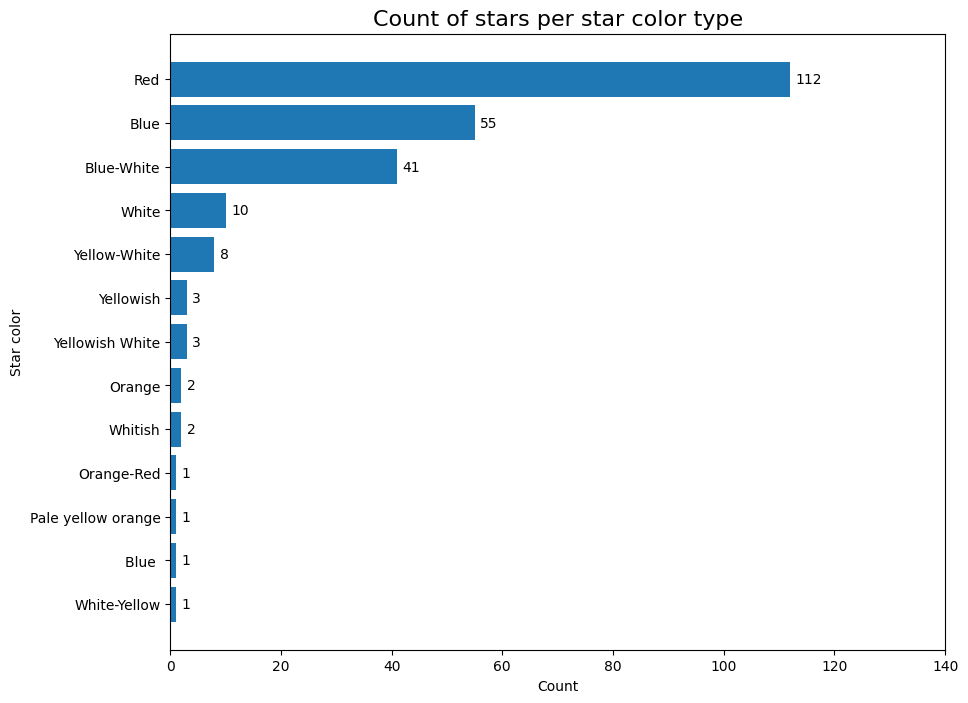

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 8))
bars = plt.barh(count_star_color.index, count_star_color['Count'])


for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 1, index - 0.1, bar.get_width())

plt.title('Count of stars per star color type', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Star color')
plt.xlim([0, 140])
plt.show()

## Star Temperature Behavior 

Here is where I will be gathering the mean, median, and std specifically for the temperature to help visulize the dataset on how temperature affects the range of the different star colors collected within the dataset.

In [ ]:
star_data.groupby('star_color').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
star_color,,,
Blue,21955.763636,19923.0,9536.927627
Blue,19860.000000,19860.0,NaN
Blue-White,16659.951220,14100.0,6560.050964
Orange,4018.000000,4018.0,380.423448
Orange-Red,5112.000000,5112.0,NaN
Pale yellow orange,7230.000000,7230.0,NaN
Red,3291.785714,3324.0,490.780761
White,9720.300000,8879.5,2563.623176
White-Yellow,7100.000000,7100.0,NaN


In [ ]:
red_star = star_data.query('star_color == "Red"')
blue_star = star_data.query('star_color == "Blue"')
blue_white_star = star_data.query('star_color == "Blue-White"')
white_star = star_data.query('star_color == "White"')
yellow_white_star = star_data.query('star_color == "Yellow-White"')

chart1 = alt.Chart(red_star).mark_bar().encode(
    x = alt.X('temperature', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('red')
).properties(title='Red')

chart2 = alt.Chart(blue_star).mark_bar().encode(
    x = alt.X('temperature', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('blue')
).properties(title='Blue')

chart3 = alt.Chart(blue_white_star).mark_bar().encode(
    x = alt.X('temperature', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('#99ccff')
).properties(title='Blue-White')

chart4 = alt.Chart(white_star).mark_bar().encode(
    x = alt.X('temperature', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('black')
).properties(title='White')

chart5 = alt.Chart(yellow_white_star).mark_bar().encode(
    x = alt.X('temperature', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('yellow')
).properties(title='Yellow-White')



In [ ]:
chart1

alt.Chart(...)

In [ ]:
chart2

alt.Chart(...)

In [ ]:
chart3

alt.Chart(...)

In [ ]:
chart4

alt.Chart(...)

In [ ]:
chart5

alt.Chart(...)

In [ ]:
boxplot = alt.Chart(star_data).mark_boxplot().encode(
    x=alt.X('star_color:N', title='Star color'),
    y=alt.Y('temperature:Q', title='Temperature (K)'),
    color=alt.Color('star_color:N', title='Star color')
).properties(
    width=400,
    height=300,
    title="Stars' temperatures boxplot related to star color type"
).configure_axis(
    labelAngle=45
)

boxplot

alt.Chart(...)

After reviewing the graphs, we can see that blue stars tend to have a higher temperature.

## Star Luminosity Behavior

Here I will be doing the same process I used for temperature where I will be analyzing the mean, median, and std of luminosity within the dataset. I will then be visualizing again the affects of the luminsity across the different star colors.

In [ ]:
star_data.groupby('star_color').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
star_color,,,
Blue,254519.727561,224780.000000,217261.615190
Blue,0.001100,0.001100,NaN
Blue-White,68904.416521,788.000000,185475.774192
Orange,590000.000000,590000.000000,56568.542495
Orange-Red,0.630000,0.630000,NaN
Pale yellow orange,0.000080,0.000080,NaN
Red,60526.787893,0.002550,104282.874572
White,94243.300229,0.000335,201123.823736
White-Yellow,0.000290,0.000290,NaN


In [ ]:
red_star = star_data.query('star_color == "Red"')
blue_star = star_data.query('star_color == "Blue"')
blue_white_star = star_data.query('star_color == "Blue-White"')
yellow_white_star = star_data.query('star_color == "Yellow-White"')

chart1 = alt.Chart(red_star).mark_bar().encode(
    x = alt.X('luminosity:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('red')
).properties(title='Red')

chart2 = alt.Chart(blue_star).mark_bar().encode(
    x = alt.X('luminosity:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('blue')
).properties(title='Blue')

chart3 = alt.Chart(blue_white_star).mark_bar().encode(
    x = alt.X('luminosity:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('#99ccff')
).properties(title='Blue-White')

chart4 = alt.Chart(yellow_white_star).mark_bar().encode(
    x = alt.X('luminosity:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color=alt.value('yellow')
).properties(title='Yellow-White')

In [ ]:
chart1

alt.Chart(...)

In [ ]:
chart2

alt.Chart(...)

In [ ]:
chart3

alt.Chart(...)

In [ ]:
chart4

alt.Chart(...)

In [ ]:
boxplot = alt.Chart(star_data).mark_boxplot().encode(
    x=alt.X('star_color:N', title='Star color'),
    y=alt.Y('luminosity:Q', title='Luminosity(L/Lo)'),
    color=alt.Color('star_color:N', title='Star color')
).properties(
    width=400,
    height=300,
    title="Stars' luminosity boxplot related to star color type"
).configure_axis(
    labelAngle=45
)

boxplot

alt.Chart(...)

After analysis of the boxplot graph, we can see that orange stars tend to have greater luminosity. There are a relatively small amount of stars of this nature in the database as they are classified as type 5 Hypergiants. If we complete further analysis of orange star types we can see the numerical values assocaited with the luminosity.

In [ ]:
star_data.query('star_color == "Orange"')

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
53,3749,550000.0,1648.0,-8.05,5,Orange,M
172,4287,630000.0,1315.0,-9.20,5,Orange,K


Stars with star color of Blue also tend to have higher temperatures as seen from the temperature boxplot. Using query, we can view the temperatures associated with stars of Blue color. 

In [ ]:
star_data.query('star_color == "Blue"')

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
30,39000,204000.00000,10.60000,-4.700,3,Blue,O
49,33750,220000.00000,26.00000,-6.100,4,Blue,B
99,36108,198000.00000,10.20000,-4.400,3,Blue,O
100,33300,240000.00000,12.00000,-6.500,4,Blue,B
101,40000,813000.00000,14.00000,-6.230,4,Blue,O
102,23000,127000.00000,36.00000,-5.760,4,Blue,O
103,17120,235000.00000,83.00000,-6.890,4,Blue,O
104,11096,112000.00000,12.00000,-5.910,4,Blue,O
105,14245,231000.00000,42.00000,-6.120,4,Blue,O
106,24630,363000.00000,63.00000,-5.830,4,Blue,O


## Heat Map

This following part is a heat map made to help color code different regions based on the various concentration of stars with their density or intensity. This map is usually used by astronomers to help identify regions of interest such as star clusters or areas of high star formation activity.

<AxesSubplot: >

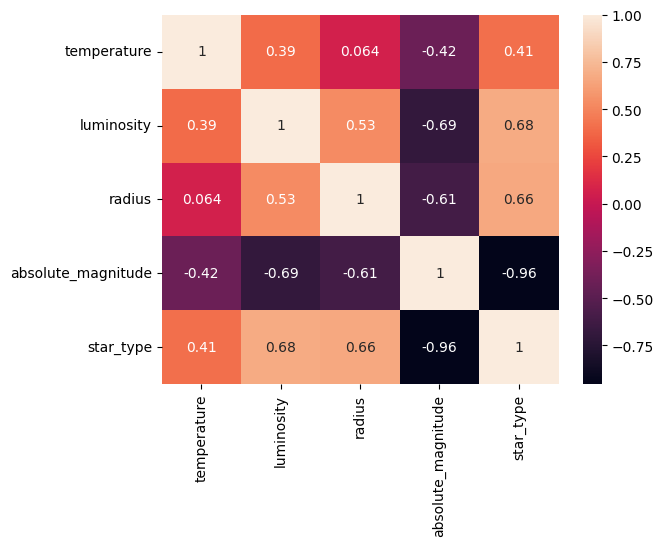

In [ ]:
import numpy as np
import seaborn as sns

heat_map = np.corrcoef([star_data['temperature'], star_data['luminosity'], star_data['radius'],
star_data['absolute_magnitude'], star_data['star_type']])

sns.heatmap(heat_map, annot=True,
xticklabels=['temperature', 'luminosity', 'radius', 
                         'absolute_magnitude', 'star_type'], 
            yticklabels=['temperature', 'luminosity', 'radius', 
                         'absolute_magnitude', 'star_type'])



## Random Forest Vs Logistic Regression for Star Type Classification

For this section of the project I will be looking at both Random Forest and Logistic Regression and will be comparing the two to see which one is a better model to use for prediciting star types. I will be using both temperature and luminosity for the parameters in predicting the different star types. I will be looking at both the accuracy of each model and will be showing a classification report to help analyze each model's performance.

## Random Forest 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X = star_data[['temperature', 'luminosity']]
y = star_data['star_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=21)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.90      0.82      0.86        11
           2       1.00      0.88      0.93         8
           3       0.92      0.86      0.89        14
           4       0.58      0.73      0.65        15
           5       0.60      0.50      0.55        12

    accuracy                           0.78        72
   macro avg       0.81      0.78      0.79        72
weighted avg       0.79      0.78      0.78        72



By using the Random Forest method I was able to achieve a accuracy of 77.8% which is very resonable and leads to the conclusion that there isn't much overfitting within this model. Looking at both the f1-score and the recall from the classification report, we can see that they are both very high which means the model was able to successfully predict the outcome of given temperature and luminosity and associate them with each star type. 

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X1 = star_data[['temperature', 'luminosity']]
y1 = star_data['star_type']

clf = LogisticRegression(max_iter=4000)

X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred_logistic = clf.predict(X_test)


In [ ]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
Accuracy: 0.4861111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        12
           2       0.26      1.00      0.42        10
           3       0.88      0.70      0.78        10
           4       0.57      0.73      0.64        11
           5       0.83      0.67      0.74        15

    accuracy                           0.49        72
   macro avg       0.42      0.52      0.43        72
weighted avg       0.42      0.49      0.42        72

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-

By using the Logisitic Regression method, I was able to only achieve an accuracy of 48.6% which is still quite a resonable accuracy given that it is realtively low and there isn't much overfitting happening within this method. However, looking at the classification matrix, we can see that the f1-scores are lower meaning that this model did a poorer job in prediciting each star type from the given temperature and luminosity. 

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

After running both the Random Forest model and the Logistic Regression model, I can conclude that using the Random Forest model is a much better model than using the Logisitc Regression model in prediciting star types from temperature and luminosity. Both model's had a resonable accuracy score which means that there wasn't too much overfitting happening in either case. However based off of the classification report, the Random Forest model had a much better overall score with f1-scores which leads to a more accuracte predicition versus the Logistic Regression model. 

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

Here is the source of the dataset: https://www.kaggle.com/datasets/deepu1109/star-dataset/data


* List any other references that you found helpful.

 The heat map was adapted from this link: https://www.kaggle.com/code/tshrimp/star-type-classification-randomforest
 

The bar graph was adapted from here:https://www.kaggle.com/code/damodarabarbosa/star-type-detection-logistic-regression-97-22


The idea of the altair charts were adapated from here: https://www.kaggle.com/code/damodarabarbosa/star-type-detection-logistic-regression-97-22